# Word_Embedding

### laoding the for use of embedding layer

In [135]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras import preprocessing 
from tensorflow.keras.datasets import imdb

In [5]:
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

/Users/david/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:128: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/david/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [9]:
max([max(i) for i in train_data])

9999

In [14]:
word_index = imdb.get_word_index() # show indices of words

In [32]:
word_index.get('film') # you can get the index of a specific word

19

In [36]:
print(train_data[0]) # these are word indices corresponding to specific words

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [37]:
Xtrain = preprocessing.sequence.pad_sequences(train_data, maxlen=20)
Xtest = preprocessing.sequence.pad_sequences(test_data, maxlen=20)

In [42]:
train_data.shape

(25000,)

In [39]:
Xtrain.shape # this is the input shape, embedding layer will take this 2D data and returns a 3D tensor (samples, sequence_length, embedding_dimensionality)

(25000, 20)

In [61]:
Xtrain[0]

array([  65,   16,   38, 1334,   88,   12,   16,  283,    5,   16, 4472,
        113,  103,   32,   15,   16, 5345,   19,  178,   32], dtype=int32)

### Using an Embedding layer and classifier on the IMDB data

In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [46]:
network = Sequential()
network.add(Embedding(10000, 8, input_length=20))
network.add(Flatten()) # Flattens the 3D tensor of embeddings into a 2D tensor of shape (samples, maxlen * 8)
network.add(Dense(1, activation='sigmoid'))
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [48]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [50]:
history = network.fit(Xtrain,train_labels, epochs=10, batch_size=32, validation_split=0.2)

/Users/david/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/ops/gradients_impl.py:111: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
2022-09-04 05:15:55.194759: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 48us/step - loss: 0.6733 - acc: 0.6088 - val_loss: 0.6288 - val_acc: 0.6924
Epoch 2/10
20000/20000 [==============================] - 1s 27us/step - loss: 0.5530 - acc: 0.7492 - val_loss: 0.5337 - val_acc: 0.7284
Epoch 3/10
20000/20000 [==============================] - 1s 26us/step - loss: 0.4672 - acc: 0.7849 - val_loss: 0.5053 - val_acc: 0.7414
Epoch 4/10
20000/20000 [==============================] - 1s 27us/step - loss: 0.4232 - acc: 0.8085 - val_loss: 0.4994 - val_acc: 0.7464
Epoch 5/10
20000/20000 [==============================] - 1s 27us/step - loss: 0.3927 - acc: 0.8258 - val_loss: 0.5002 - val_acc: 0.7470
Epoch 6/10
20000/20000 [==============================] - 1s 26us/step - loss: 0.3677 - acc: 0.8394 - val_loss: 0.5054 - val_acc: 0.7478
Epoch 7/10
20000/20000 [==============================] - 1s 28us/step - loss: 0.3458 - acc: 0.8520 - val_loss: 0.5145 - val_acc:

In [75]:
acc = history.history['acc']
loss = history.history['loss']
val_loss =history.history['val_loss']
val_acc = history.history['val_acc']

In [63]:
import matplotlib.pyplot as plt

In [74]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

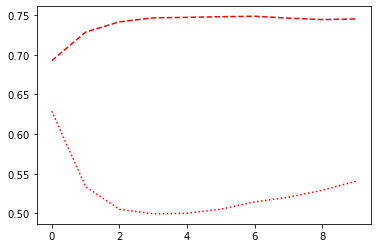

In [81]:
plt.plot(range(10), val_loss, ':r')
plt.plot(range(10), val_acc, '--r'); # when epoch = 3, the model starts to overfit the training data

# from raw text to word embeddings

### Processing the labels of the raw IMDB data

In [95]:
import os

In [96]:
imdb_dir = 'aclImdb'

In [97]:
train_dir = os.path.join(imdb_dir, 'train')

In [98]:
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] =='.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type=='neg':
                labels.append(0)
            else:
                labels.append(1)

In [99]:
np.unique(labels)

array([0, 1])

In [100]:
texts[1] # one example

'Well...tremors I, the original started off in 1990 and i found the movie quite enjoyable to watch. however, they proceeded to make tremors II and III. Trust me, those movies started going downhill right after they finished the first one, i mean, ass blasters??? Now, only God himself is capable of answering the question "why in Gods name would they create another one of these dumpster dives of a movie?" Tremors IV cannot be considered a bad movie, in fact it cannot be even considered an epitome of a bad movie, for it lives up to more than that. As i attempted to sit though it, i noticed that my eyes started to bleed, and i hoped profusely that the little girl from the ring would crawl through the TV and kill me. did they really think that dressing the people who had stared in the other movies up as though they we\'re from the wild west would make the movie (with the exact same occurrences) any better? honestly, i would never suggest buying this movie, i mean, there are cheaper ways to 

### tokenizing the text of the raw IMDB data

In [101]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy 

In [102]:
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

In [103]:
tokenizer = Tokenizer(num_words = max_words)

In [104]:
tokenizer.fit_on_texts(texts)

In [105]:
sequences = tokenizer.texts_to_sequences(texts)

In [106]:
word_index = tokenizer.word_index

In [107]:
word_index.get('of') 

4

In [108]:
print(sequences[0]) # these are the indices of those words that are in the first document

[777, 16, 28, 4, 1, 115, 2278, 6887, 11, 19, 1025, 5, 27, 5, 42, 2425, 1861, 128, 2270, 5, 3, 6985, 308, 7, 7, 3383, 2373, 1, 19, 36, 463, 3169, 2, 222, 3, 1016, 174, 20, 49, 808]


In [109]:
print('Found %s unique tokens.' % len(word_index))

Found 88582 unique tokens.


In [110]:
data = pad_sequences(sequences, maxlen = maxlen)

In [111]:
labels = np.asarray(labels)

In [112]:
print(f'shape of data tensor: {data.shape}')

shape of data tensor: (25000, 100)


In [113]:
print(f'shape of label shape: {labels.shape}')

shape of label shape: (25000,)


In [114]:
indices = np.arange(data.shape[0]) 

In [115]:
np.random.shuffle(indices) # randomize the samples 

In [116]:
data = data[indices]
labels = labels[indices]

In [117]:
Xtrain = data[:training_samples]
ytrain = labels[:training_samples]
xval = data[training_samples: training_samples + validation_samples]
yval = labels[training_samples: training_samples + validation_samples]

### Parsing the GloVe word-embeddings file

In [118]:
glove_dir = 'glove.6B'

In [119]:
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [121]:
print(f'length of embedding index: {len(embeddings_index)}')

length of embedding index: 400000


In [123]:
embeddings_index.get('the') # one example

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

In [131]:
embeddings_index.get('the').shape

(100,)

### Preparing the GloVe word-embeddings matrix

In [124]:
embedding_dim = 100

In [132]:
embedding_matrix = np.zeros(shape=(max_words, embedding_dim)) # max_words =10000 as we defined previously
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [133]:
embedding_matrix.shape

(10000, 100)

### build the model

In [137]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [138]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [139]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.fit(Xtrain, ytrain, epochs=10, batch_size=32, validation_data=[xval, yval])

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 1.7695 - acc: 0.5100 - val_loss: 0.7238 - val_acc: 0.4936
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5969 - acc: 0.6350 - val_loss: 0.6912 - val_acc: 0.5354
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5768 - acc: 0.7800 - val_loss: 0.9323 - val_acc: 0.5095
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4161 - acc: 0.7500 - val_loss: 0.8556 - val_acc: 0.5283
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2689 - acc: 0.8700 - val_loss: 0.6890 - val_acc: 0.5755
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1721 - acc: 0.9550 - val_loss: 0.8247 - val_acc: 0.5401
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0837 - acc: 1.0000 - val_loss: 0.7294 - val_acc: 0.5729
Epoch 8/10
200/200 [========

In [175]:
model.save_weights('pre_trained_glove_model.h5')

In [140]:
import matplotlib.pyplot as plt

In [148]:
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

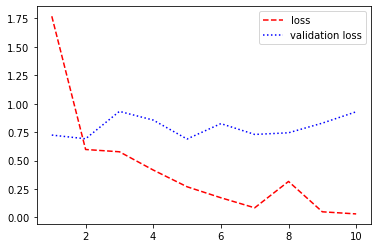

In [154]:
epoch = range(1, len(loss)+1)
plt.plot(epoch, loss, '--r', label='loss')
plt.plot(epoch, val_loss, ':b', label='validation loss')
plt.legend();  # The model quickly starts overfitting, which is unsurprising given the small number of training samples.

In [151]:
acc = model.history.history['acc']
val_acc = model.history.history['val_acc']

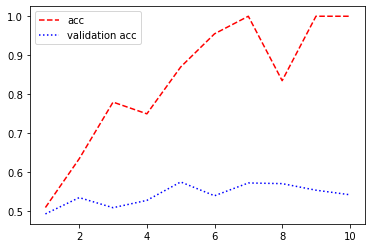

In [155]:
epoch = range(1, len(loss)+1)
plt.plot(epoch, acc, '--r', label='acc')
plt.plot(epoch, val_acc, ':b', label='validation acc')
plt.legend(); # The model quickly starts overfitting, which is unsurprising given the small number of training samples.

### Training the same model without pretrained word embeddings

In [156]:
model2 = Sequential()
model2.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model2.add(Flatten())
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model2.fit(Xtrain, ytrain, epochs=10, batch_size=32, validation_data=[xval, yval])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


/Users/david/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/ops/gradients_impl.py:111: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6911 - acc: 0.5500 - val_loss: 0.6928 - val_acc: 0.5116
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5155 - acc: 0.9650 - val_loss: 0.7008 - val_acc: 0.5149
Epoch 3/10
200/200 [==============================] - 0s 1ms/step - loss: 0.3075 - acc: 0.9800 - val_loss: 0.6967 - val_acc: 0.5154
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1387 - acc: 1.0000 - val_loss: 0.7064 - val_acc: 0.5216
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0662 - acc: 1.0000 - val_loss: 0.7065 - val_acc: 0.5209
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0337 - acc: 1.0000 - val_loss: 0.7160 - val_acc: 0.5249
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0184 - acc: 1.0000 - val_loss: 0.7327 - val_acc: 0.5225
Epoch 8/10
200/200 [========

In [157]:
loss = model2.history.history['loss']
val_loss = model2.history.history['val_loss']

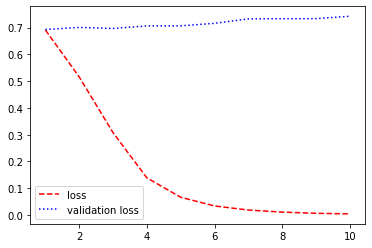

In [161]:
epoch = range(1, len(loss)+1)
plt.plot(epoch, loss, '--r', label='loss')
plt.plot(epoch, val_loss, ':b', label='validation loss')
plt.legend();

In [159]:
acc = model2.history.history['acc']
val_acc = model2.history.history['val_acc']

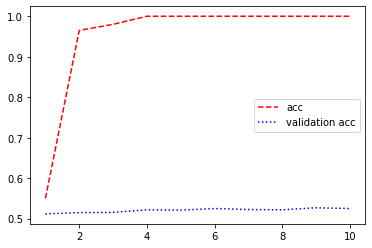

In [162]:
epoch = range(1, len(loss)+1)
plt.plot(epoch, acc, '--r', label='acc')
plt.plot(epoch, val_acc, ':b', label='validation acc')
plt.legend();

### Tokenizing the data of the test set

In [163]:
train_dir = os.path.join(imdb_dir, 'test')

In [164]:
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] =='.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type=='neg':
                labels.append(0)
            else:
                labels.append(1)

In [165]:
sequences = tokenizer.texts_to_sequences(texts)

In [172]:
Xtest = pad_sequences(sequences, maxlen = maxlen)
ytest = np.asarray(labels)

In [183]:
model.evaluate(Xtest, ytest) # 54% test accuracy, training sample is too small 

25000/25000 [==============================] - 1s 32us/step


[0.9330080100345611, 0.53736]